In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

# 데이터 로드

In [3]:
file = "C:/Users/송이두/Desktop/가천대/2-1/인공지능개론/과제/data/wine.csv"
wine = pd.read_csv(file)

In [4]:
wine.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


# 결측치 확인

In [6]:
wine.isna().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

# 레이블 불균형 확인

In [7]:
wine["Wine"].value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

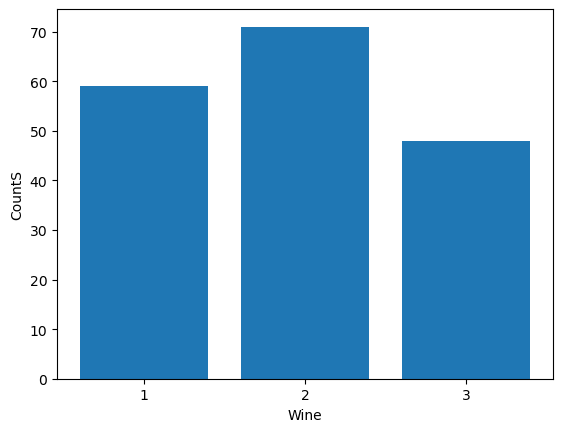

In [8]:
x = wine['Wine'].value_counts().index
y = wine['Wine'].value_counts().values
plt.bar(x, y)
plt.xticks(x)
plt.xlabel('Wine')
plt.ylabel("CountS")
plt.show()

# 데이터 스케일링

In [9]:
X = wine.drop(['Wine'], axis=1)
y = wine['Wine'].copy()

In [10]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [11]:
X[:5], scaled_X[:5]

(   Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
 0    14.23        1.71  2.43  15.6  127     2.80        3.06   
 1    13.20        1.78  2.14  11.2  100     2.65        2.76   
 2    13.16        2.36  2.67  18.6  101     2.80        3.24   
 3    14.37        1.95  2.50  16.8  113     3.85        3.49   
 4    13.24        2.59  2.87  21.0  118     2.80        2.69   
 
    Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
 0                  0.28     2.29       5.64  1.04  3.92     1065  
 1                  0.26     1.28       4.38  1.05  3.40     1050  
 2                  0.30     2.81       5.68  1.03  3.17     1185  
 3                  0.24     2.18       7.80  0.86  3.45     1480  
 4                  0.39     1.82       4.32  1.04  2.93      735  ,
 array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
          0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
          0.36217728,  1.84791957,  1.01300893],
  

# 훈련 세트, 테스트 세트 분리

In [12]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=0)

In [13]:
X_train.shape

(142, 13)

# RF

In [14]:
# 모델 선언
rf_clf = RandomForestClassifier(random_state=0)
# 모델 학습
rf_clf.fit(X_train, y_train)
#예측 생성
pred_rf = rf_clf.predict(X_test)
# accuracy 및 confusion matrix 확인
acc_rf = accuracy_score(y_test, pred_rf)
print(f"accuracy: {acc_rf}")
cm_rf = confusion_matrix(y_test, pred_rf)
print(f"confusion matrix:\n{cm_rf}")

accuracy: 0.9722222222222222
confusion matrix:
[[14  0  0]
 [ 0 15  1]
 [ 0  0  6]]


# LR

In [15]:
# 모델 선언
lr_clf = LogisticRegression(random_state=0)
# 모델 학습
lr_clf.fit(X_train, y_train)
#예측 생성
pred_lr = lr_clf.predict(X_test)
# accuracy 및 confusion matrix 확인
acc_lr = accuracy_score(y_test, pred_lr)
print(f"accuracy: {acc_lr}")
cm_lr = confusion_matrix(y_test, pred_lr)
print(f"confusion matrix:\n{cm_lr}")

accuracy: 1.0
confusion matrix:
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


# KNN

In [16]:
#모델 선언
knn_clf = KNeighborsClassifier(n_neighbors=3)
# 모델 학습
knn_clf.fit(X_train, y_train)
#예측 생성
pred_knn = knn_clf.predict(X_test)
# accuracy 및 confusion matrix 확인
acc_knn = accuracy_score(y_test, pred_knn)
print(f"accuracy: {acc_knn}")
cm_knn = confusion_matrix(y_test, pred_knn)
print(f"confusion matrix:\n{cm_knn}")

accuracy: 0.9444444444444444
confusion matrix:
[[14  0  0]
 [ 1 14  1]
 [ 0  0  6]]


# SVM

In [17]:
# 모델 선언
svm_clf = SVC(random_state=0)
# 모델 학습
svm_clf.fit(X_train, y_train)
#예측 생성
pred_svm = svm_clf.predict(X_test)
# accuracy 및 confusion matrix 확인
acc_svm = accuracy_score(y_test, pred_svm)
print(f"accuracy: {acc_svm}")
cm_svm = confusion_matrix(y_test, pred_svm)
print(f"confusion matrix:\n{cm_svm}")

accuracy: 1.0
confusion matrix:
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


# DL

In [24]:
#y값 원-핫 인코딩 변환
Y_1hot = pd.get_dummies(y).values

In [22]:
print(y[:5])
print("------------------------------")
Y_1hot[:5]

0    1
1    1
2    1
3    1
4    1
Name: Wine, dtype: int64
------------------------------


array([[ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False],
       [ True, False, False]])

In [23]:
X_train,X_test, y_train,y_test = train_test_split(scaled_X,Y_1hot,test_size=0.2,random_state=0) 

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142, 3), (36, 3))

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(13,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(3,activation='sigmoid'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

C:\Users\송이두\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 10)                  │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.18 KB)

 Trainable params: 303 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.3866 - loss: 1.1525 - val_accuracy: 0.3611 - val_loss: 1.1630
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4353 - loss: 1.1239 - val_accuracy: 0.3611 - val_loss: 1.1342
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4175 - loss: 1.1288 - val_accuracy: 0.3889 - val_loss: 1.1057
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4623 - loss: 1.0667 - val_accuracy: 0.4167 - val_loss: 1.0803
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5134 - loss: 1.0541 - val_accuracy: 0.4444 - val_loss: 1.0580
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5289 - loss: 0.9992 - val_accuracy: 0.4722 - val_loss: 1.0373
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4980 - loss: 1.0163 - val_accuracy: 0.4722 - val_loss: 1.0175
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5388 - loss: 0.9667 - val_accuracy: 0.5000 - val_loss: 0.9979

In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        14
           1       1.00      0.44      0.61        16
           2       0.86      1.00      0.92         6

    accuracy                           0.75        36
   macro avg       0.83      0.81      0.77        36
weighted avg       0.83      0.75      0.73        36

[[14  0  0]
 [ 8  7  1]
 [ 0  0  6]]
